In [139]:
!pip install caer canaro

In [140]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [141]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [142]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

#Classificar em ordem decrescente
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [143]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [144]:
# Criar treinamento de dados 
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.2238667011260986s
[INFO] At 1000 files
[INFO] 1454 files found in 1.7430617809295654s
[INFO] At 1000 files
[INFO] 1452 files found in 1.8342719078063965s
[INFO] At 1000 files
[INFO] 1354 files found in 1.847853660583496s
[INFO] At 1000 files
[INFO] 1342 files found in 1.7405328750610352s
[INFO] At 1000 files
[INFO] 1291 files found in 1.8750553131103516s
[INFO] At 1000 files
[INFO] 1206 files found in 1.7887756824493408s
[INFO] At 1000 files
[INFO] 1194 files found in 1.7991774082183838s
[INFO] At 1000 files
[INFO] 1193 files found in 1.9740831851959229s
[INFO] At 1000 files
[INFO] 1079 files found in 1.8224012851715088s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 55s


In [145]:
len(train)

13811

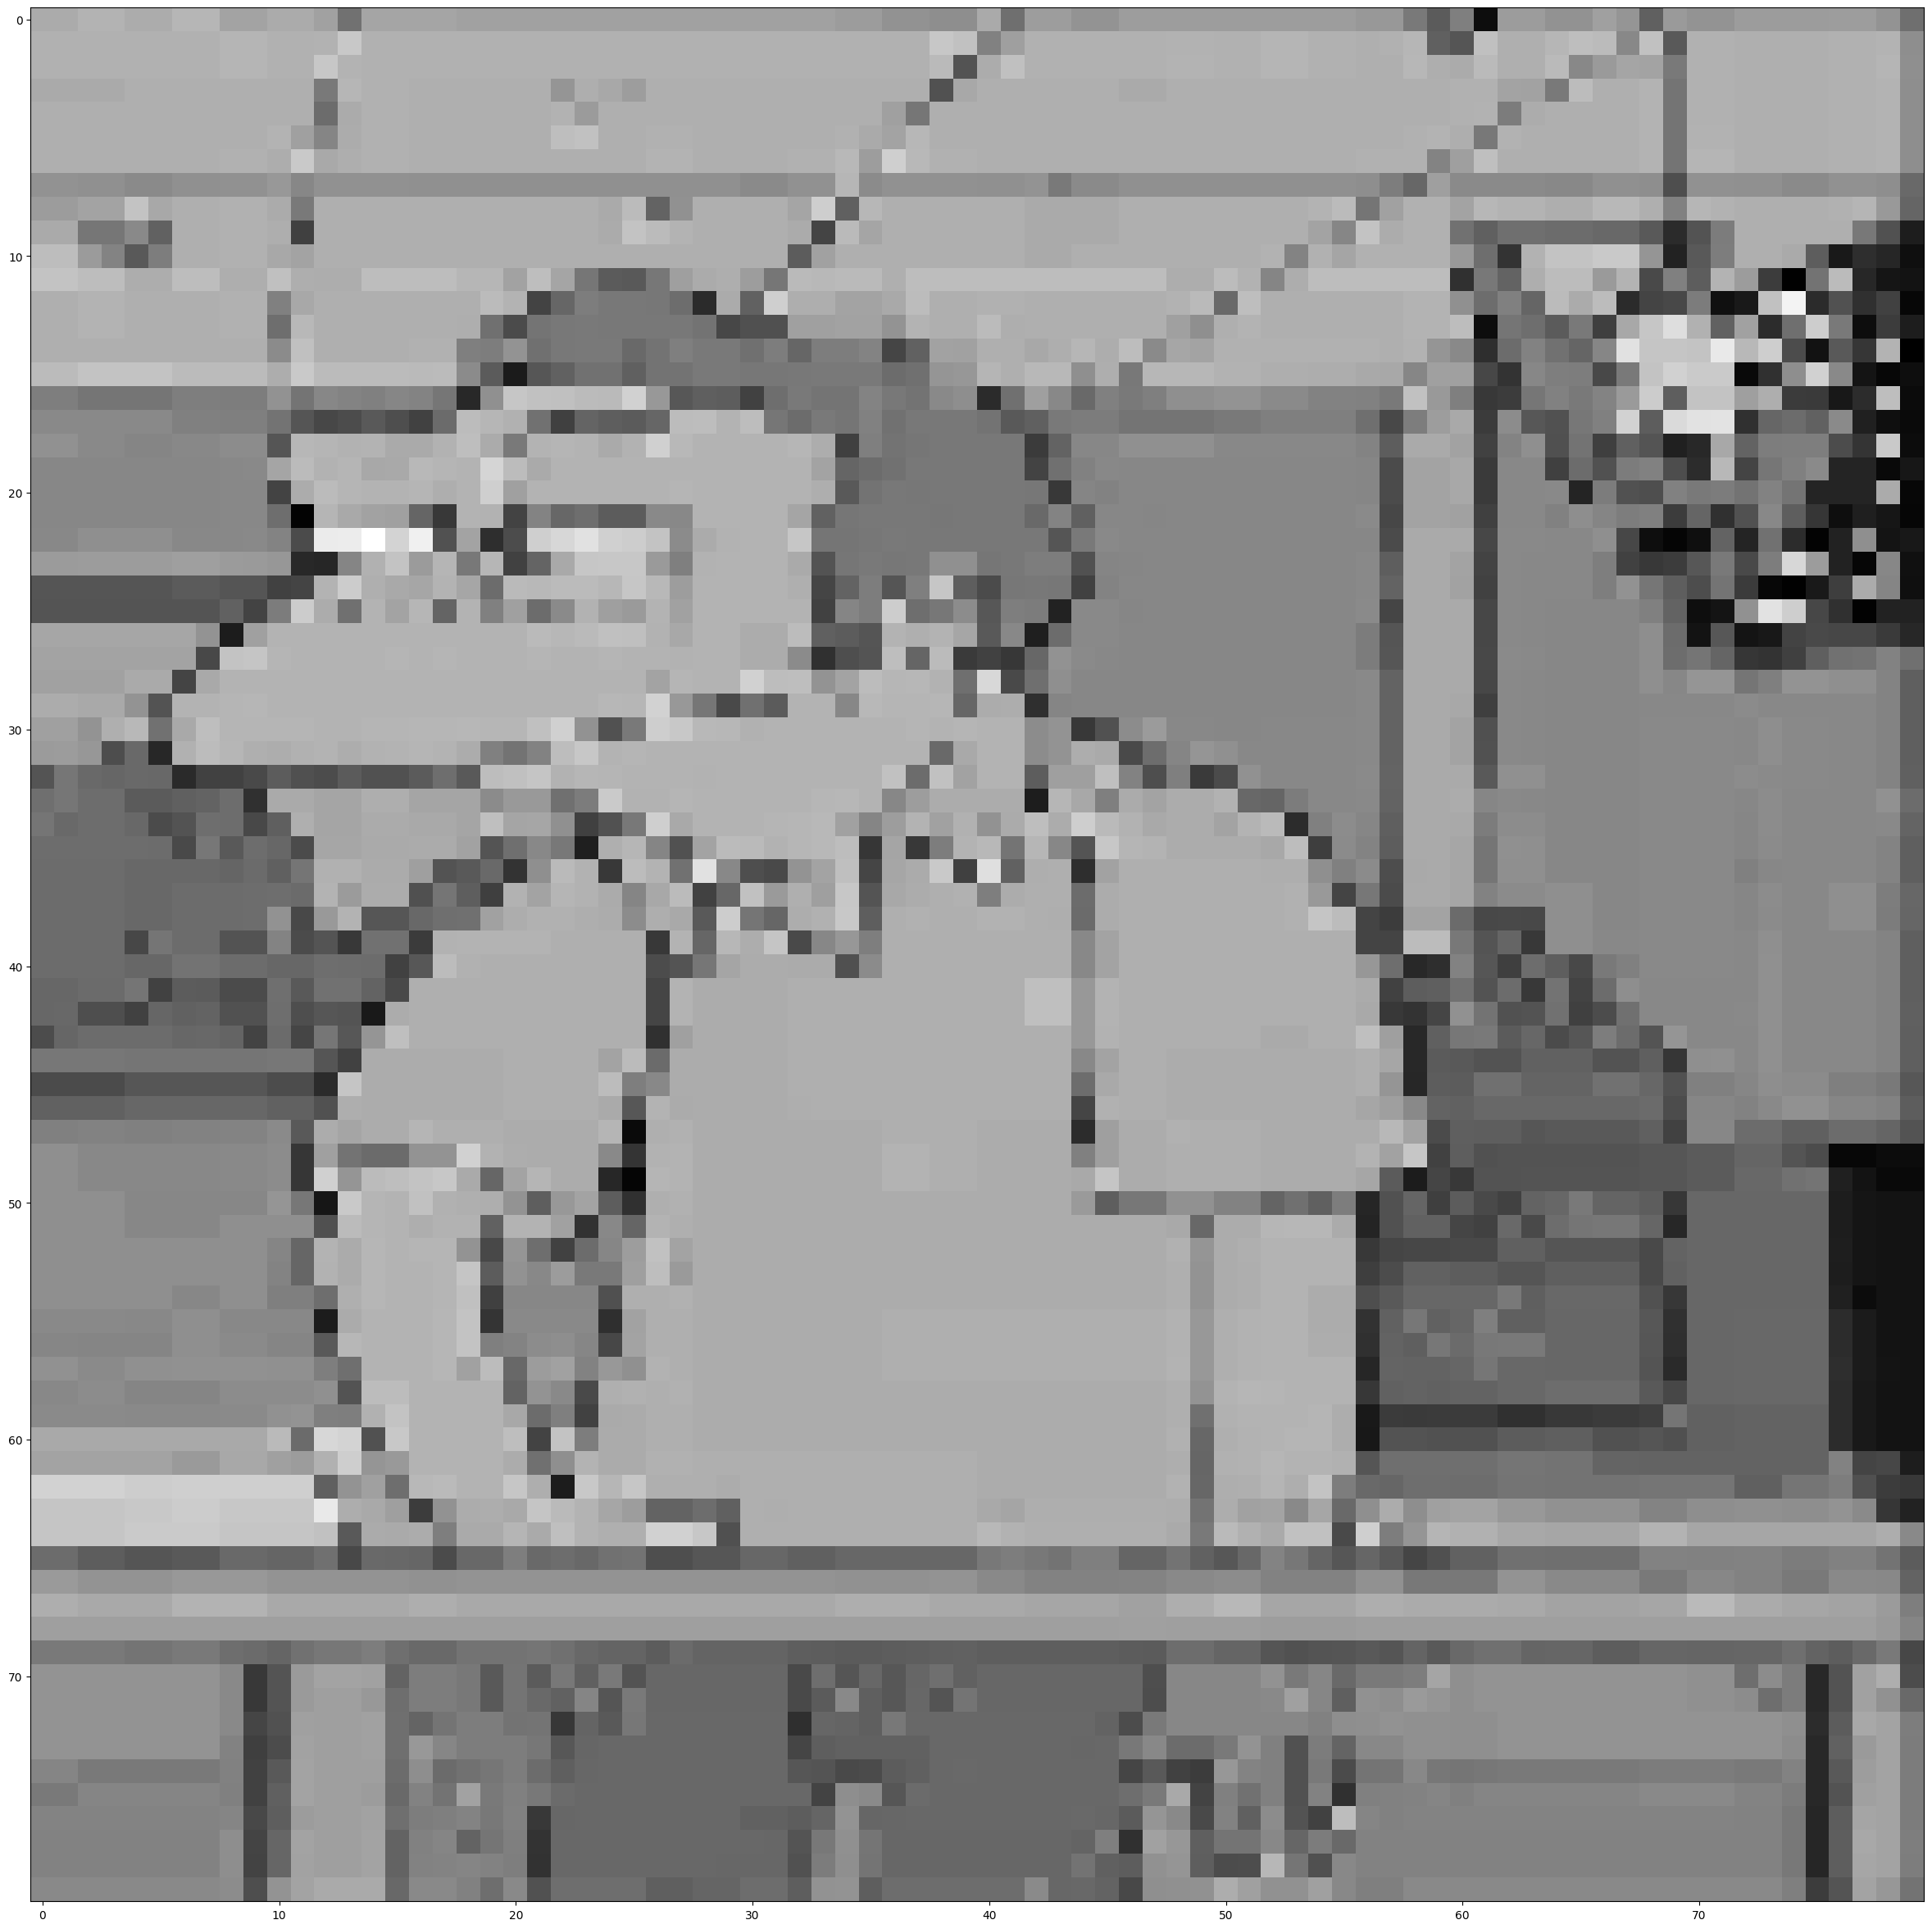

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [147]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [148]:
from tensorflow.keras.utils import to_categorical
# Normalizar conjunto ==>(0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [149]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [150]:
del train
del featureSet
del labels
gc.collect()

0

In [151]:
# Importações necessárias
from tensorflow.keras.optimizers import Adam  # Importe o otimizador Adam

# Configuração dos hiperparâmetros
BATCH_SIZE = 128  # Tamanho do lote (pode ajustar conforme sua GPU)
EPOCHS = 50      # Número de épocas de treinamento

# Criação do otimizador Adam com taxa de aprendizado personalizada
optimizer = Adam(
    learning_rate=0.001,  # Taxa de aprendizado inicial
    beta_1=0.9,          # Parâmetro para cálculo da média do gradiente
    beta_2=0.999,        # Parâmetro para cálculo da média do quadrado do gradiente
    epsilon=1e-07        # Termo para evitar divisão por zero
)

# Compilação do modelo
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',  # Ou 'binary_crossentropy' para 2 classes
    metrics=['accuracy']
)  # Melhor que SGD

In [152]:
from canaro.generators import imageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use o ImageDataGenerator padrão do Keras para ter todos os parâmetros de aumento de dados
datagen = ImageDataGenerator(
    rotation_range=30,       # Rotação aleatória até 30 graus
    width_shift_range=0.2,   # Deslocamento horizontal (20% da largura)
    height_shift_range=0.2,  # Deslocamento vertical (20% da altura)
    shear_range=0.2,         # Distorção de cisalhamento
    zoom_range=0.2,          # Zoom aleatório
    horizontal_flip=True,    # Inversão horizontal
    fill_mode='nearest',     # Preenchimento de pixels
    rescale=1./255           # Normalização [0-1]
)

# Gerador de treino
train_gen = datagen.flow(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Gerador de validação (sem aumento de dados)
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow(x_val, y_val, batch_size=BATCH_SIZE)

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# Defina as dimensões corretas
IMG_SIZE = (80, 80, 1)  # 80x80 pixels, 1 canal (grayscale)
output_dim = 10  # Número de classes

model = Sequential([
    Input(shape=IMG_SIZE),  # Camada de entrada com shape correto
    
    # Bloco 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # 80x80 -> 40x40
    Dropout(0.2),
    
    # Bloco 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # 40x40 -> 20x20
    Dropout(0.3),
    
    # Bloco 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),  # 20x20 -> 10x10
    Dropout(0.4),
    
    # Camadas Densas
    Flatten(),  # 10x10x128 = 12800 elementos
    Dense(512, activation='relu'),  # Reduzido para 512 neurônios
    BatchNormalization(),
    Dropout(0.5),
    Dense(output_dim, activation='softmax')
])

In [154]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)                   │ (None, 80, 80, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 80, 80, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 78, 78, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 78, 78, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 39, 39, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 39, 39, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 37, 37, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 18, 18, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,490,218 (17.13 MB)

 Trainable params: 4,488,298 (17.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [155]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy # Ou CategoricalCrossentropy se seus labels são one-hot encoded

# Configuração do otimizador SGD melhorado
optimizer = SGD(
    learning_rate=0.01,  # Taxa maior para SGD puro
    momentum=0.9,
    nesterov=True,
    weight_decay=1e-4  # Regularização L2 incorporada
)

# Compilação correta para classificação multiclasse
model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),  # Para labels inteiros (0, 1, 2,...)
    # Ou loss='categorical_crossentropy' se usar one-hot encoding
    metrics=['accuracy']
)

In [156]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import math

# 1. Definição do Agendamento de Learning Rate Personalizado
def lr_schedule(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# 2. Callbacks Adicionais para Melhor Controle
callbacks_list = [
    LearningRateScheduler(lr_schedule),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

# 3. Treinamento com Validação Adequada
history = model.fit(
    train_gen,
    steps_per_epoch=max(1, len(x_train)//BATCH_SIZE),  # Garante no mínimo 1 passo
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    validation_steps=max(1, len(y_val)//BATCH_SIZE),  # Garante no mínimo 1 passo
    callbacks=callbacks_list,
    verbose=1
)

Epoch 1/50
54/86 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1493 - loss: 3.2457

RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL InternalError REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/errors_impl.py(462): __init__
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/execute.py(53): quick_execute
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/context.py(1683): call_function
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(251): call_flat
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(216): call_preflattened
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/concrete_function.py(1322): _call_flat
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/tracing_compilation.py(139): call_function
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(878): _call
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(833): __call__
  /usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py(219): function
  /usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py(371): fit
  /usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py(117): error_handler
  /tmp/ipykernel_35/284709645.py(20): <cell line: 0>
  /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py(3553): run_code
  /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py(3473): run_ast_nodes
  /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py(3257): run_cell_async
  /usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py(78): _pseudo_sync_runner
  /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py(3030): _run_cell
  /usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py(2975): run_cell
  /usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py(528): run_cell
  /usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py(383): do_execute
  /usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py(730): execute_request
  /usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py(406): dispatch_shell
  /usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py(499): process_one
  /usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py(510): dispatch_queue
  /usr/lib/python3.11/asyncio/events.py(84): _run
  /usr/lib/python3.11/asyncio/base_events.py(1936): _run_once
  /usr/lib/python3.11/asyncio/base_events.py(608): run_forever
  /usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py(205): start
  /usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py(712): start
  /usr/local/lib/python3.11/dist-packages/traitlets/config/application.py(992): launch_instance
  /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py(37): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


In [ ]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [ ]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE[:2])
    img = caer.reshape(img, IMG_SIZE[:2], 1)
    return img

In [159]:

predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


In [158]:
predictions

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [157]:
print(characters[np.argmax(predictions[0])])

krusty_the_clown
